<a href="https://colab.research.google.com/github/swaroopsaikuchi/DL_models/blob/main/CNN_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras


Load Dataset

In [105]:
x_train = np.loadtxt('/content/drive/MyDrive/Copy of input.csv', delimiter=',')
x_test = np.loadtxt('/content/drive/MyDrive/Copy of input_test.csv',delimiter=',')

y_train = np.loadtxt('/content/drive/MyDrive/Copy of labels.csv',delimiter = ',')
y_test = np.loadtxt('/content/drive/MyDrive/Copy of labels_test.csv',delimiter =',')

In [107]:
x_train.shape


(2000, 100, 100, 3)

In [112]:
y_train.shape

(2000, 1)

In [113]:
x_test.shape

(400, 100, 100, 3)

In [114]:
y_test.shape

(400, 1)

In [88]:
x_train


array([[ 37.,  39.,  25., ...,  58.,  54.,  29.],
       [131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [111]:
# now lets reshape this
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
x_test = x_test.reshape(len(x_test),100,100,3)

In [90]:
x_train

array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [125]:
# the values ranges from 0 to 255 because of rgb
# so we will do scaling , dividing by 255
x_train = x_train /255
y_train = y_train /255
x_test = x_test /255
y_test = y_test /255

In [92]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

<function matplotlib.pyplot.show(close=None, block=None)>

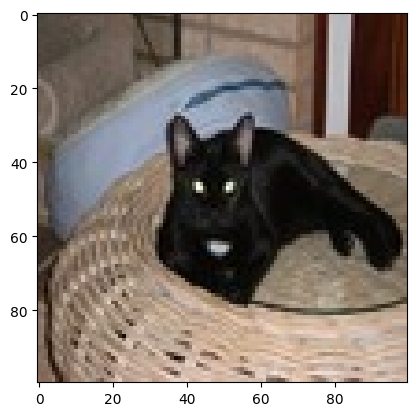

In [93]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show

Model


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(25,3,activation = 'relu' ,input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(2,padding = 'valid'),
    tf.keras.layers.Conv2D(25,3,activation ='relu'),
    tf.keras.layers.MaxPool2D(2,padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

In [95]:
model.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["Accuracy"])

In [115]:
history= model.fit(x_train,y_train,
                        epochs = 5,batch_size =64)

Epoch 1/5
32/32 [==============================] - 19s 562ms/step - loss: 57.4822 - Accuracy: 0.4935
Epoch 2/5
32/32 [==============================] - 25s 779ms/step - loss: 0.6534 - Accuracy: 0.5985
Epoch 3/5
32/32 [==============================] - 24s 747ms/step - loss: 0.4988 - Accuracy: 0.7580
Epoch 4/5
32/32 [==============================] - 17s 543ms/step - loss: 0.3241 - Accuracy: 0.8755
Epoch 5/5
32/32 [==============================] - 17s 549ms/step - loss: 0.1778 - Accuracy: 0.9400


In [116]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 69ms/step - loss: 1.2236 - Accuracy: 0.5375


[1.2236299514770508, 0.5375000238418579]

Making Predictions

1/1 [==============================] - 0s 25ms/step


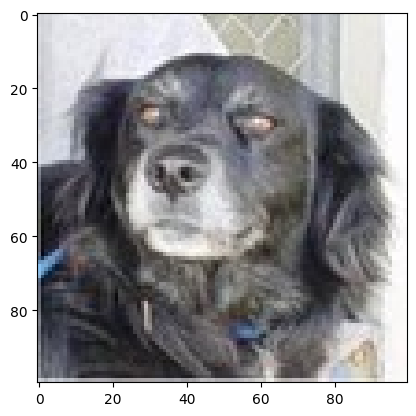

In [126]:
idx2 = random.randint(0,len(y_test))
y_predict = model.predict(x_test[idx2,:].reshape(1,100,100,3))
plt.imshow(x_test[idx2,:])
plt.show()
